# Price Optimizaiton based on price elasticity of Demand

# Price Elasticity

# EDA - Sell Dataset

In [5]:
# Imoprt the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [22]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [8]:
# Display all rows and columns of a dataframe instead of truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
sold = pd.read_csv('data/Cafe_Sell_Meta_Data.csv')
transcation = pd.read_csv('data/Cafe_Transaction_Store.csv')
date_info = pd.read_csv('data/Cafe_DateInfo.csv')

In [28]:
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [23]:
sold.describe()
sold.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [26]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, idenitifier of the combination of items that is contained in the product

SELL_CATEGORY: "0" identifies single products; "2" identiifies the combination of products

ITEM_ID: a categorical variable, identifier of the item that is contained in the product

ITEM_NAME: a categorical variale, identifying the name of the item

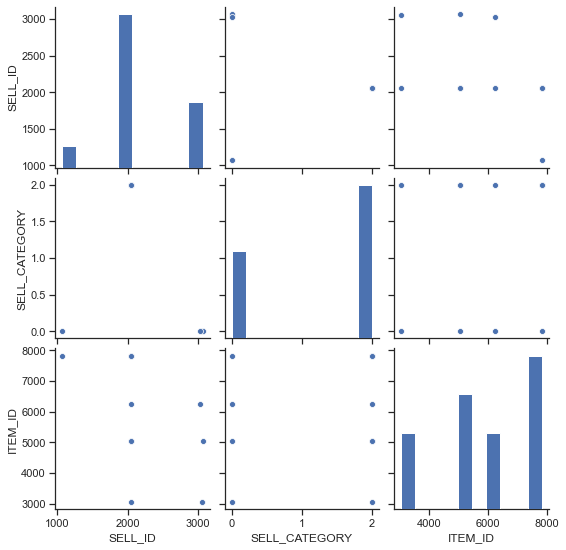

In [27]:
sns.pairplot(sold)